# Matplotlib tutorial (Advanced) 

This tutorial continues on plotting with Python. Two packages will be introduced: __Seaborn__ and __Cartopy__. Seaborn is a Python library  for making statistical graphics based on Matplotlib and Cartopy is a Python package designed for geospatial data visualization. We will first illustrate alternative ways for plots in statistics with Seaborn, then show plotting of geospatial maps with Cartopy.

* Plots in statistics with Seaborn: histograms, density plots, ecdf plots, bar charts, box plots, and scatter plots
* Plotting maps with Cartopy: a simple example, adding features to the map, and plotting 2D data

## Plots in statistics with Seaborn

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them. Compared with Matplotlib, Seaborn helps you save your time and efforts on customizing the figures.

We first import the packages that might be used.

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Here, we utilize the "diamonds" dataset from Seaborn package for the demonstration of plots in statistics.

In [14]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

### Histograms

There are two functions to plot histograms in Seaborn. `displot` provides figure-level interface for drawing distribution plots. By changing the argument `kind`, you can plot histograms, kernel density plots, and empirical cumulative distribution plots. The alternative functions are `histplot()`, `kdeplot()`, and `ecdfplot()`.

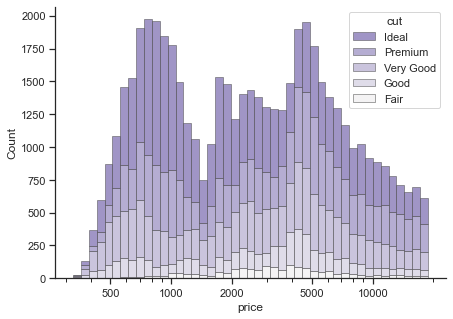

In [21]:
# changes the global defaults
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))

# removes the top and right axes spines
sns.despine(f)

# plot according to classification
sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,  # log scale
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

Alternatively, you can use `displot()` function. The other settings are more or less similar.

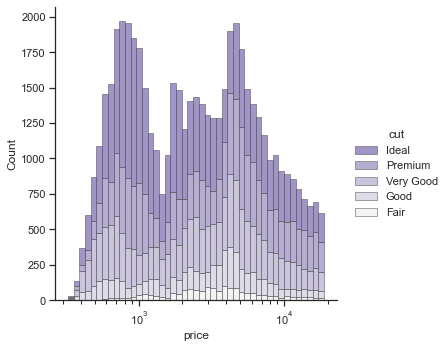

In [43]:
# changes the global defaults
sns.set_theme(style="ticks")

# removes the top and right axes spines
sns.despine(f)

# plot according to classification
sns.displot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,  # log scale
    kind='hist'
)

### Density plots

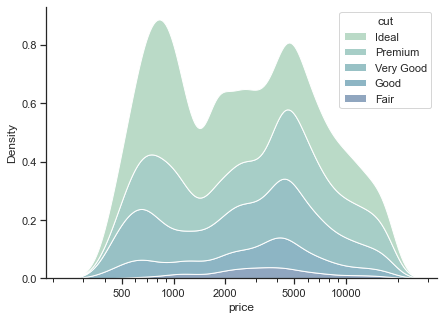

In [30]:
# changes the global defaults
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))

# removes the top and right axes spines
sns.despine(f)

# plot according to classification
sns.kdeplot(
    data=diamonds,
    x="price", hue="cut",multiple="stack",
    fill=True, common_norm=True,  palette="crest",
    alpha=.5, 
    log_scale=True,  # log scale
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

Alternatively,

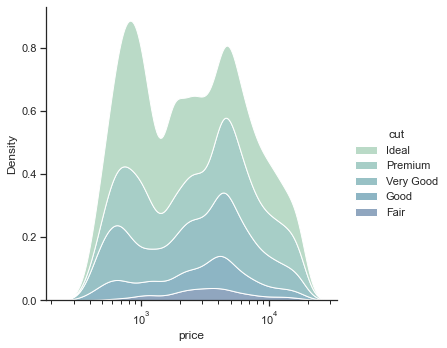

In [50]:
# changes the global defaults
sns.set_theme(style="ticks")

# removes the top and right axes spines
sns.despine(f)

# plot according to classification
sns.displot(
    data=diamonds,
    x="price", hue="cut",multiple="stack",
    fill=True, common_norm=True,  palette="crest",
    alpha=.5, 
    log_scale=True,  # log scale
    kind='kde'
)


### Empirical cumulative distribution functions (ecdf) plots

An ECDF represents the proportion or count of observations falling below each unique value in a dataset. It also aids direct comparisons between multiple distributions. 

<AxesSubplot:xlabel='price', ylabel='Proportion'>

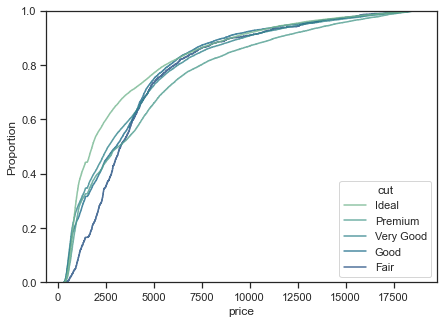

In [65]:
f, ax = plt.subplots(figsize=(7, 5))

# plot according to classification
sns.ecdfplot(
    data=diamonds,
    x="price", hue="cut",
    palette="crest",
    alpha=.8, 
)

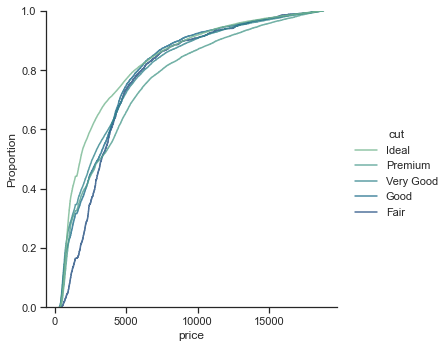

In [68]:
# plot according to classification
sns.displot(
    data=diamonds,
    x="price", hue="cut",
    palette="crest",
    alpha=.8, 
    kind='ecdf'
)

### Bar charts

Bar charts are one of the categorical plots, which could be handled by `catplot()` with argument `kind="bar"`. Besides, `catplot()` can also generate box plots, violin plots, swarm plots, and so on.

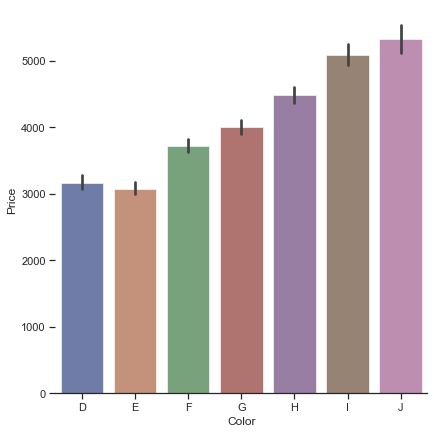

In [40]:
g = sns.catplot(
    data=diamonds, kind="bar",
    x="color", y="price", 
    ci=99, palette="dark", alpha=.6, height=6
)
# ci: Size of confidence intervals to draw around estimated values. 

g.despine(left=True)
g.set_axis_labels("Color", "Price")

The other way for bar charts is `barplot()` function.

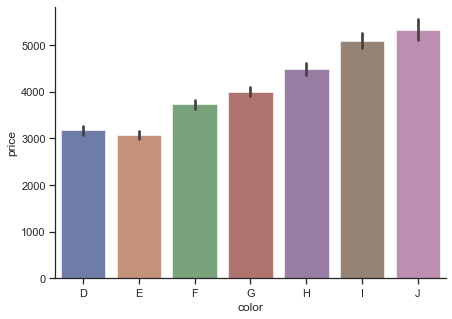

In [76]:
f, ax = plt.subplots(figsize=(7, 5))

sns.barplot(
    data=diamonds, 
    x="color", y="price", 
    ci=99, palette="dark", alpha=.6
)
# ci: Size of confidence intervals to draw around estimated values. 

sns.despine(f)

### Box plots

The box plot is another kind of categorical plots to show the distribution of the data.

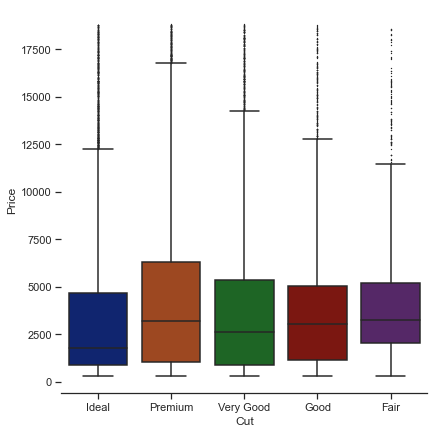

In [92]:
g = sns.catplot(
    data=diamonds, kind="box",
    x="cut", y="price", 
    palette="dark", 
    height=6,
    orient="v",
    whis=2,
    fliersize=0.5
)
# fliersize: Size of the markers used to indicate outlier observations.
# whis: Proportion of the IQR past the low and high quartiles to extend the plot whiskers.

g.despine(left=True)
g.set_axis_labels("Cut", "Price")

Alternatively,

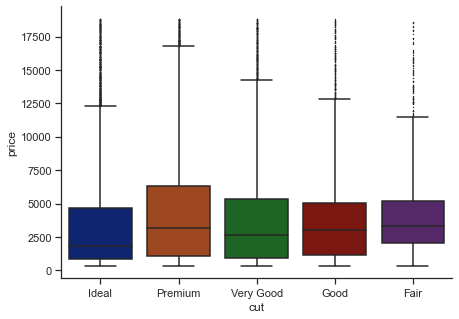

In [96]:
f, ax = plt.subplots(figsize=(7, 5))

sns.boxplot(
    data=diamonds, 
    x="cut", y="price", 
    palette="dark", 
    orient="v",
    whis=2,
    fliersize=0.5
)
# fliersize: Size of the markers used to indicate outlier observations.
# whis: Proportion of the IQR past the low and high quartiles to extend the plot whiskers.

sns.despine(f)

### Scatter plots

Scatter plots could be generated by `scatterplot()`. For example,

<AxesSubplot:xlabel='x', ylabel='price'>

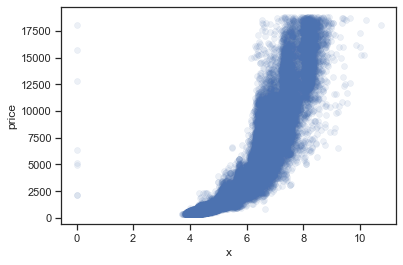

In [103]:
sns.scatterplot(data=diamonds, x="x", y="price", alpha=0.1, edgecolor=None)

In addition, Seaborn has a function called `pairplot()`, which shows the scatter matrix and is extremely useful for multivariate analysis. We use "penguins" dataset for this example.

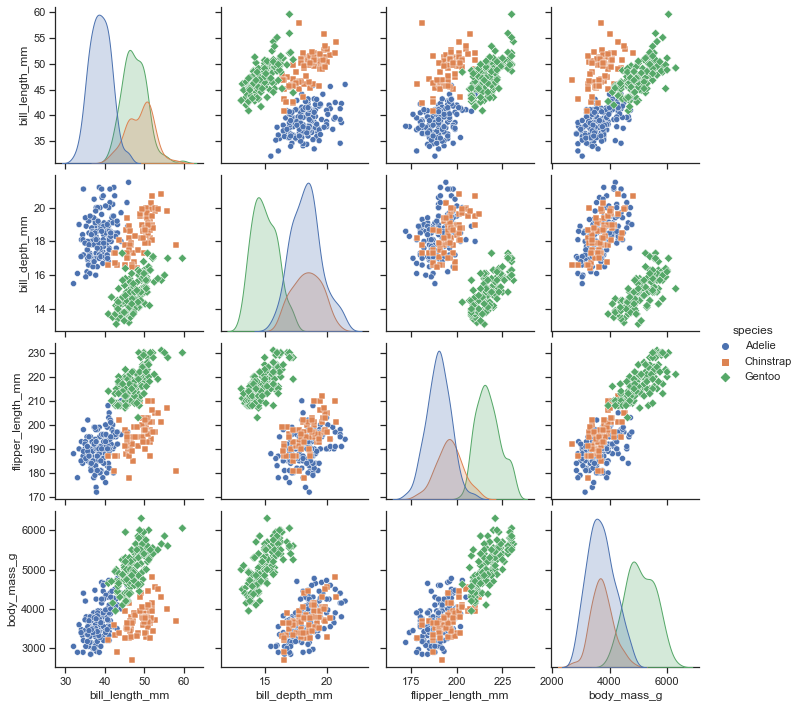

In [106]:
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species", markers=["o", "s", "D"])

## Plotting maps with Cartopy

Mapping is a special case of a regular plot which usually involves some of these elements:
- A map projection to transform data from the spherical shape of the earth to screen/paper
- Additional geospatial features like coastlines, rivers, country boundaries etc.

In this section, we will demonstrate how to plot geospatial maps for climate analysis using Cartopy. Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses. It makes use of the powerful PROJ, NumPy and Shapely libraries and includes a programmatic interface built on top of Matplotlib for the creation of publication quality maps.

We'll first introduce a simple example to get you familiar with Cartopy.

### A simple example

As usual, we start by importing our modules.

In [2]:
# import packages needed for the example
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# plots show in the notebook
%matplotlib inline  

# additional configuration (optional)
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina' 

Then we create some dummy data for plotting.

In [109]:
# define a regularly spaced vector of longitudes
lon = np.linspace(-80, 80, 25)
# Same for latitudes
lat = np.linspace(30, 70, 25)
# we need to create a 2d array of longitudes and latitudes to create 2D data
lon2d, lat2d = np.meshgrid(lon, lat) 

# finally we create some dummy data 
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)


Now we plot the data as filled contour.

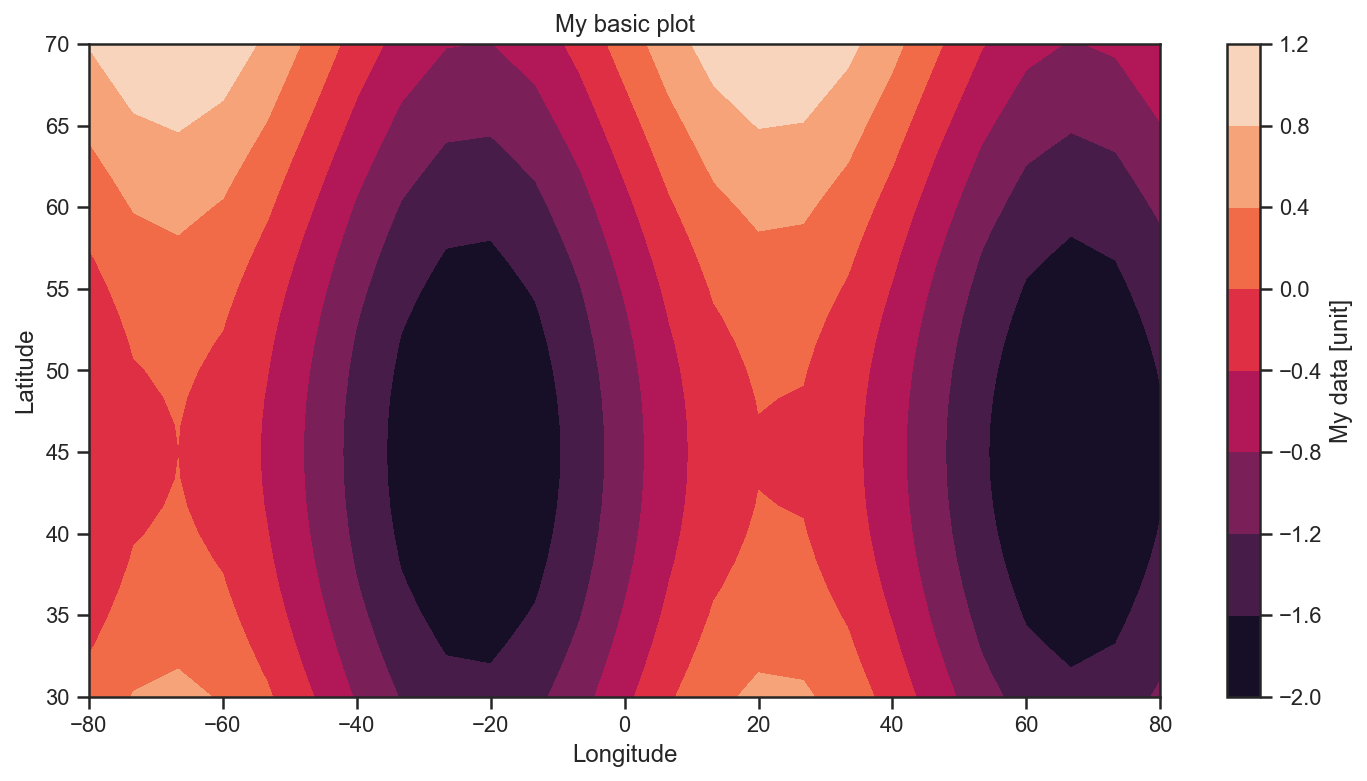

In [113]:
plt.contourf(lon, lat, data)
plt.title('My basic plot')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.colorbar(label='My data [unit]') 

Then we move the above 2D filled-contour plot to the map.

E:\software\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


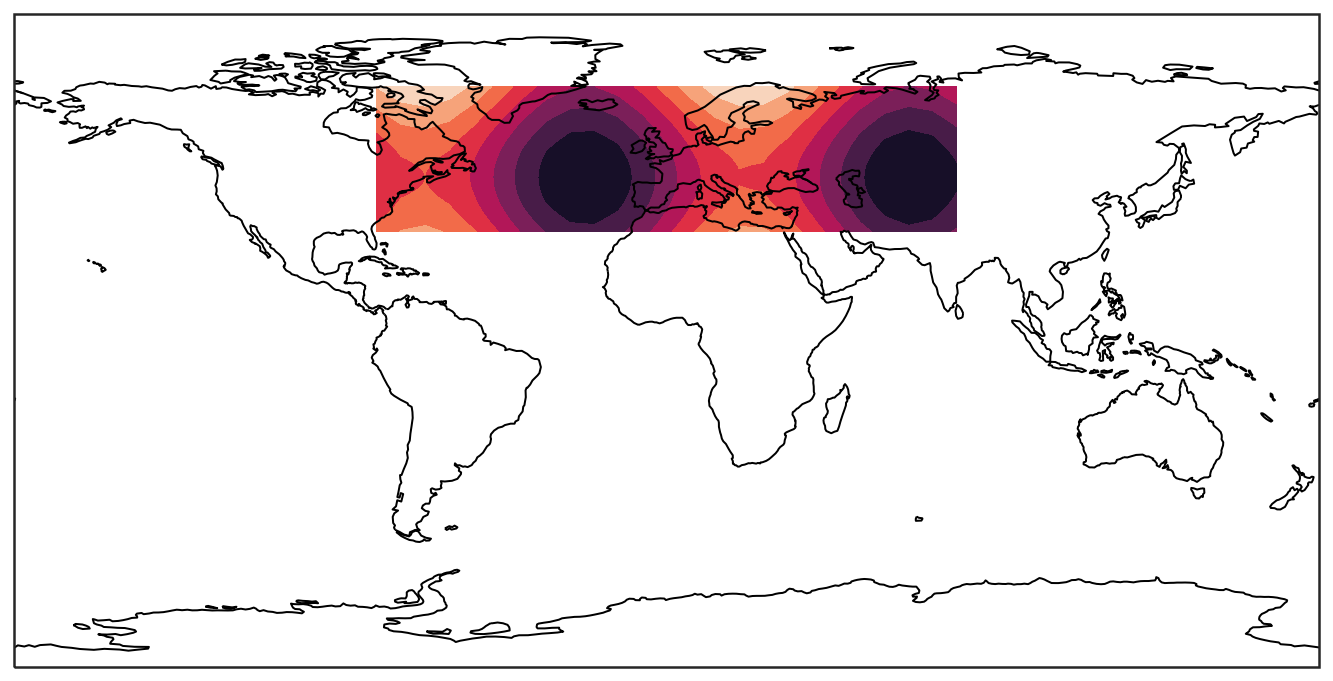

In [116]:
ax = plt.axes(projection=ccrs.PlateCarree()) 
# projection: ccrs.PlateCarree() is one type of projection
ax.contourf(lon, lat, data)

# optional (Comment the lines with a leading # and see what changes)
ax.set_global() # zoom out as far as possible
ax.coastlines() # plot coastlines
#ax.gridlines()

Note that to plot a map, you need to manually create an axis (which means `plt.plot()` does not work anymore) and pass a `projection=...` keyword to the axis. The projection argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The line `plt.axes(projection=ccrs.PlateCarree())` sets up a GeoAxes instance which exposes a variety of other map related methods. You may pick your own projection such as Miller, Orthographic, or Robinson.

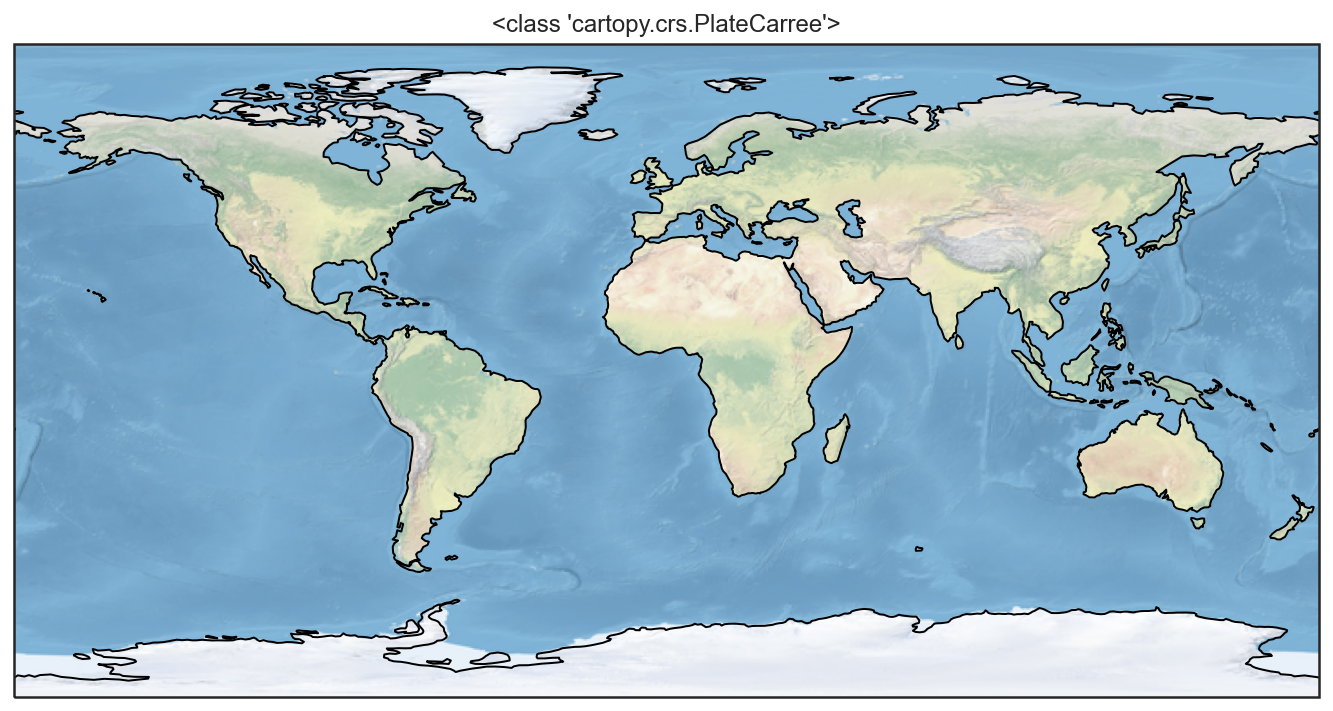

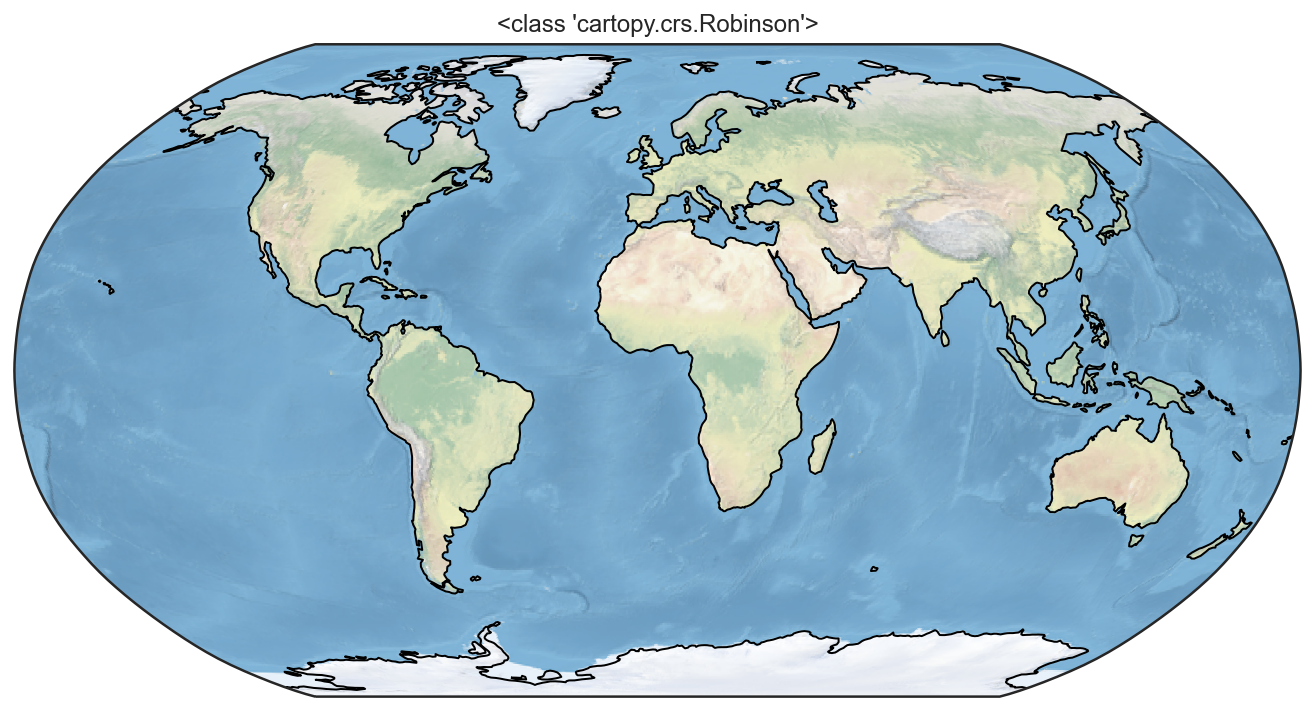

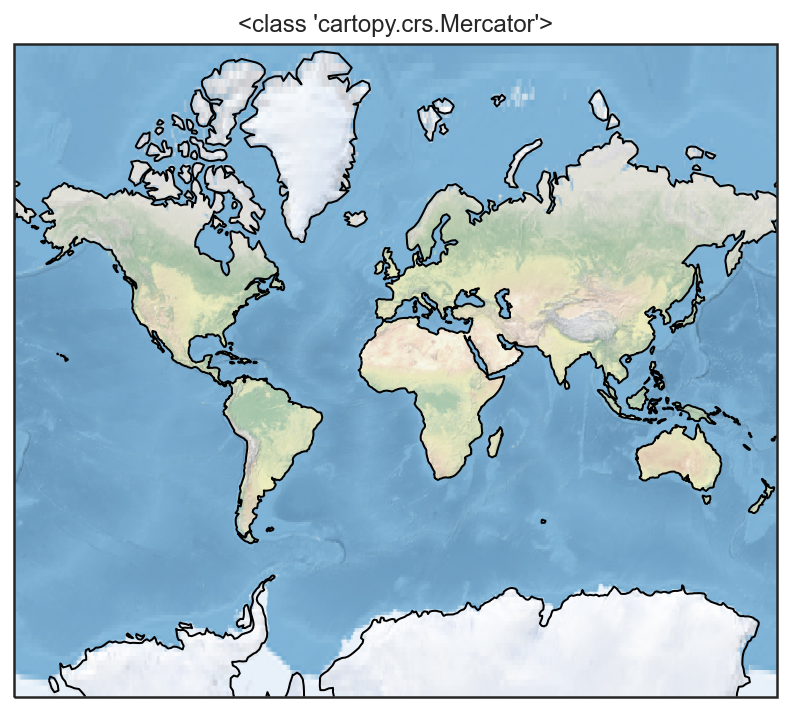

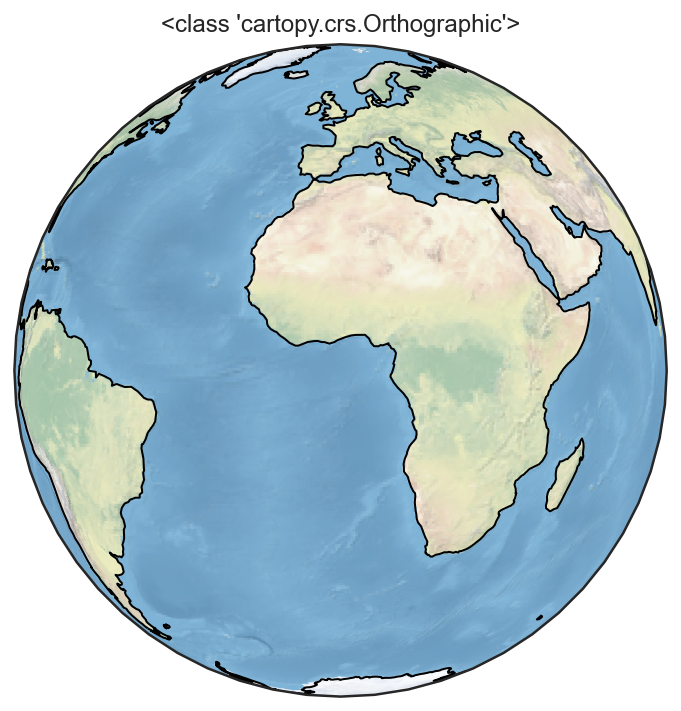

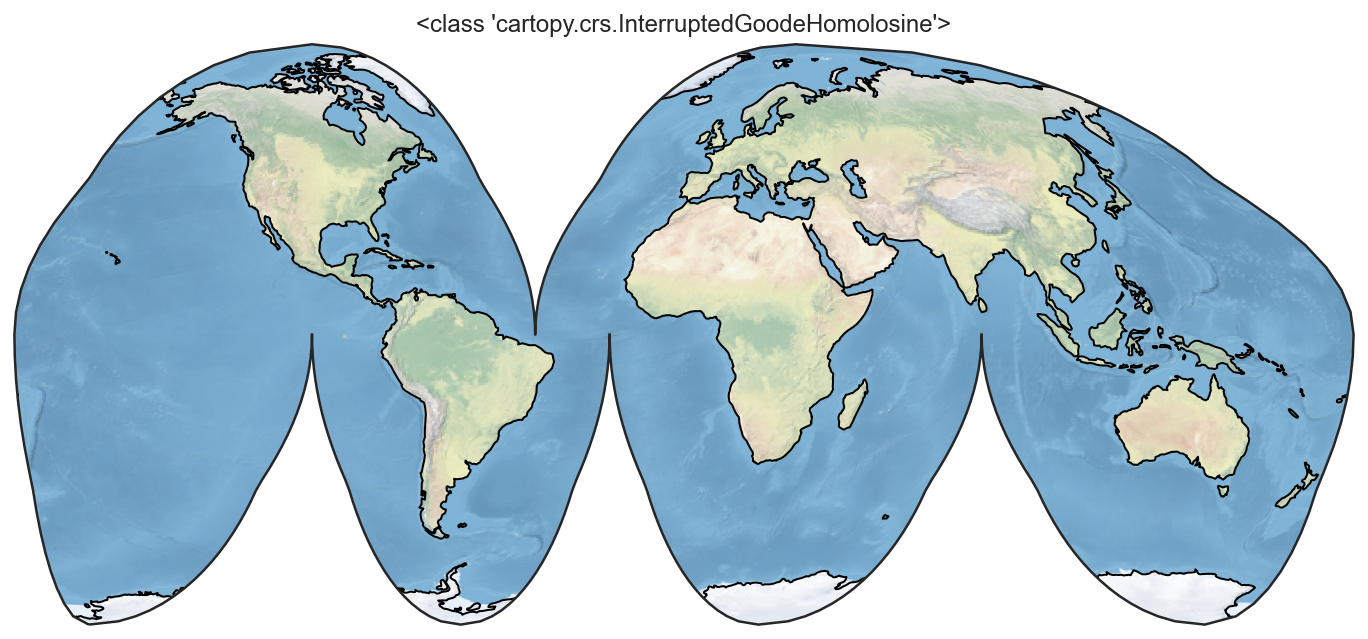

In [118]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]

for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

If we want to plot the data in another projection, we need to pass a `transform=...` argument to the plot command. The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in.

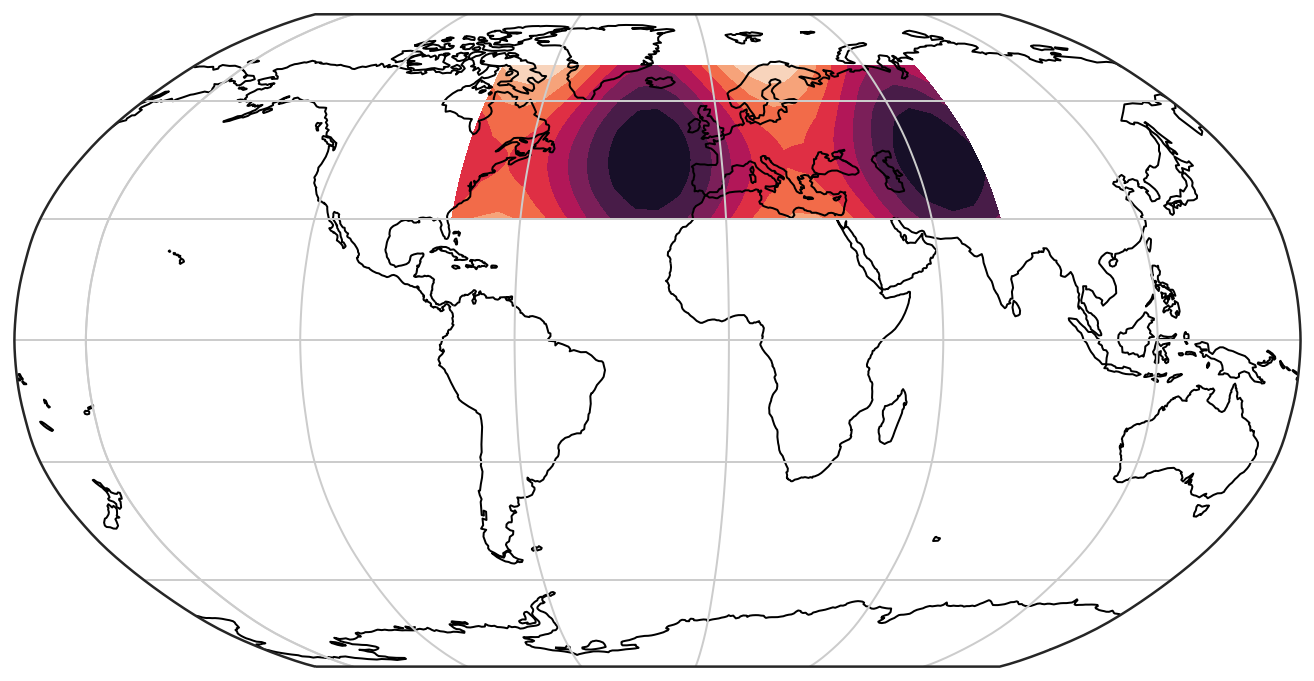

In [119]:
projection = ccrs.Robinson(-20) #this is the central longitude for the projection! Try to change it
#projection = ccrs.InterruptedGoodeHomolosine() # Comment the line above and uncomment this for another projection
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.gridlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

In Cartopy, we can very easily plot coastlines (`ax.coastlines()`) and gridlines (`ax.gridlines()`), which give a better context for the data than before and also show the full globe. 

For regional map, use `set_extent()`.

E:\software\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


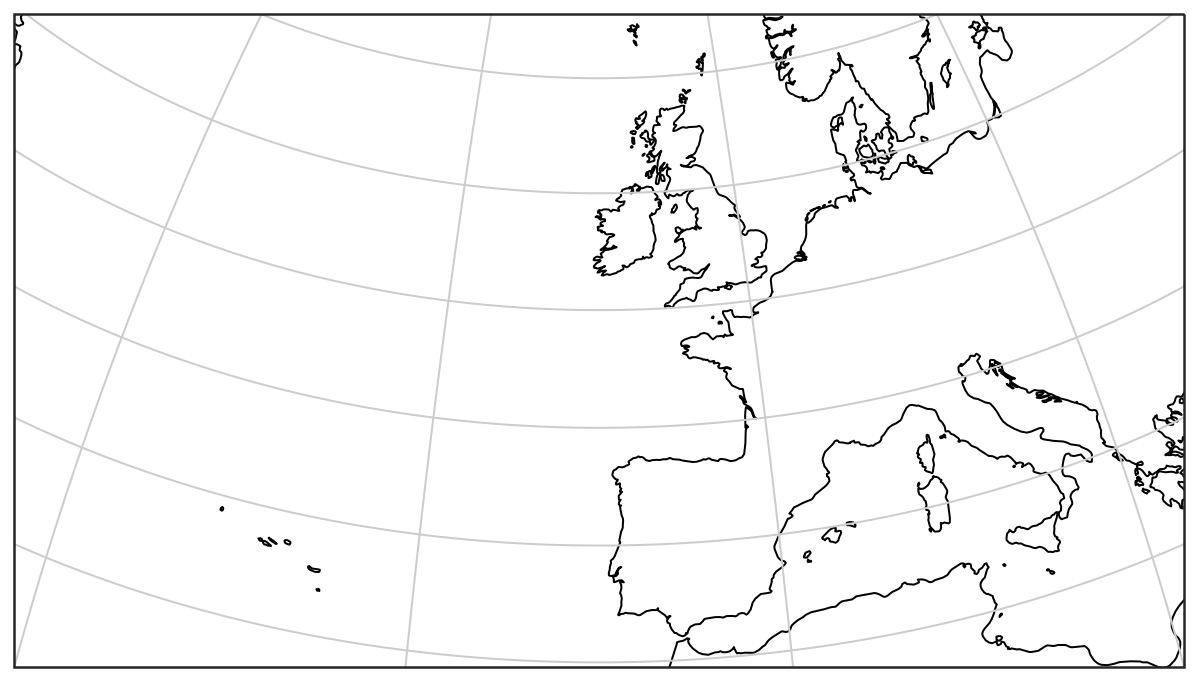

In [120]:
central_lon, central_lat = -10, 45
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')

### Adding features to the map

To give our map more styles and details, we add `cartopy.feature` objects. Many useful features are built in. These "default features" are at coarse (110m) resolution.

* `cartopy.feature.BORDERS`: Country boundaries
* `cartopy.feature.COASTLINE`: Coastline, including major islands
* `cartopy.feature.LAKES`: Natural and artificial lakes
* `cartopy.feature.LAND`: Land polygons, including major islands
* `cartopy.feature.OCEAN`: Ocean polygons
* `cartopy.feature.RIVERS`: Single-line drainages, including lake centerlines
* `cartopy.feature.STATES`: (limited to the United States at this scale)

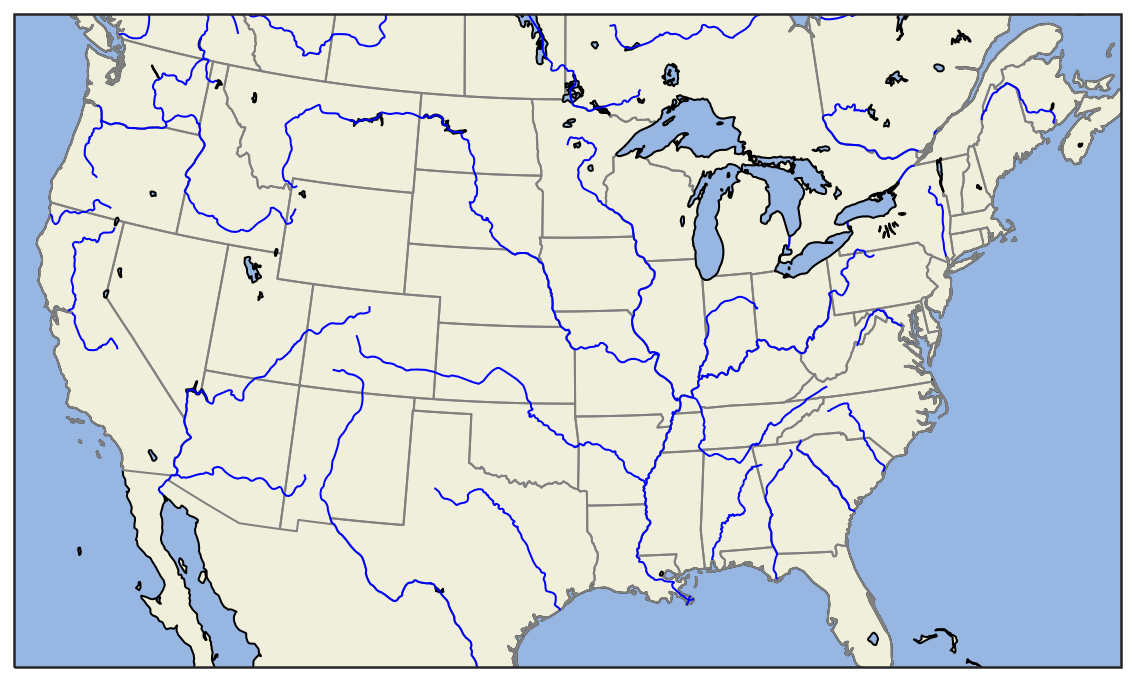

In [127]:
import cartopy.feature as cfeature

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES, edgecolor='grey')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, facecolor='None', edgecolor='blue')
# ax.gridlines()

### Plotting 2D data

Note that Cartopy transforms can be passed to xarray. This creates a very quick path for creating professional looking maps from netCDF data. In this section, we use the ERA5-Land reanalysis data of monthly 2m temperature in 2020 to demonstrate how to plot maps from a dataset.

In [31]:
import xarray as xr
# Set working directory to the folder where your .nc file is located
fn = '../../assets/data/ERA5_monthly_2020_t2m.nc'
# fn = 'ERA5_monthly_2020_tpt2m.nc'
ds = xr.open_dataset(fn)
ds

<xarray.Dataset>
Dimensions:    (latitude: 551, longitude: 1041, time: 12)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
  * longitude  (longitude) float32 -18.0 -17.9 -17.8 -17.7 ... 85.8 85.9 86.0
  * latitude   (latitude) float32 51.0 50.9 50.8 50.7 ... -3.7 -3.8 -3.9 -4.0
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Mon Oct 11 09:09:15 2021: cdo selname,tp,t2m ERA5_monthly_2...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

Xarray has a simple chioce for plotting, which is `Dataset.plot()`. After specifying the projected axes and transformed axes, it generate the map automatically.

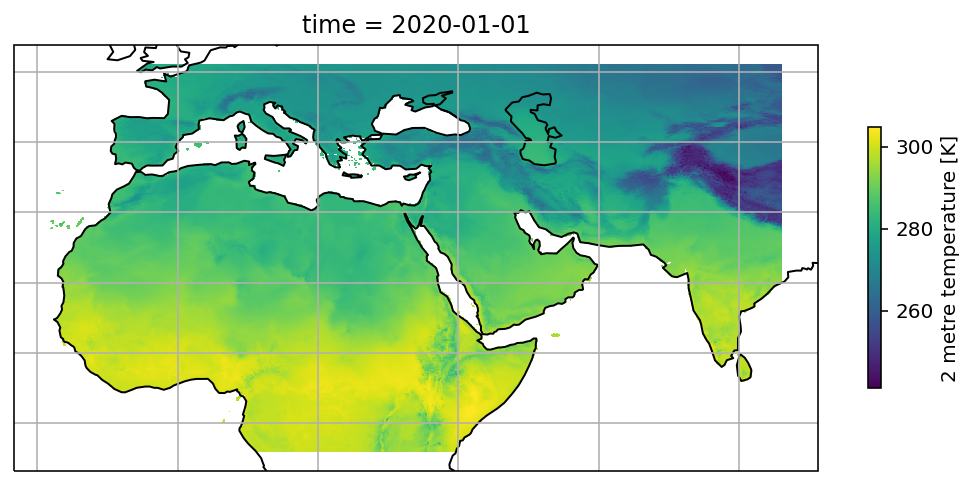

In [7]:
t2m = ds.t2m.sel(time='2020-01-01', method='nearest')
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
t2m.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.4})

You may use xarray to manipulate the netCDF file. Alternatively, you can use netCDF4 package to import the dataset as in the following codes:

In [29]:
import netCDF4 as nc

# Displays the content of your NetCFD file (.nc)
# With this operation you can find the variable names, dimension, and units
ds = nc.Dataset(fn)
print(ds,'\n\n')
# ds gives us information about the variables contained in the file and their dimensions.
for var in ds.variables.values():
    print(var,'\n')

# Read data according to the variable names
lon = ds.variables['longitude'][:]
lat = ds.variables['latitude'][:]
t2m = ds.variables['t2m'][0]  # 2m-temperature for 2020-01

# Note t2m is a multidimensional array as we extracted several
# tiles specified by their longitude and latitude (first two dimensions);
# it is at first over the time of 1 year at monthly time step (12),
# but we select the first month by specifying index 0

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    CDI: Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Mon Oct 11 09:09:15 2021: cdo selname,tp,t2m ERA5_monthly_2020.nc ERA5_monthly_2020_tpt2m.nc
Mon Oct 11 09:07:11 2021: cdo selyear,2020 ERA5_monthly_1985to2020.nc ERA5_monthly_2020.nc
2021-04-16 11:48:30 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data8/adaptor.mars.internal-1618572459.4065554-24933-2-a4312836-aa80-4b81-9ae1-c5b6d1e86609.nc /cache/tmp/a4312836-aa80-4b81-9ae1-c5b6d1e86609-adaptor.mars.internal-1618572459.4070513-24933-1-tmp.grib
    CDO: Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg.de/cdo)
    dimensions(sizes): time(12), longitude(1041), latitude(551)
    variables(dimensions): int32 time(time), float32 longitude(longitude), float32 latitude(latitude), int16 t2m(time,latitude,longitude), int16 tp(tim

<ipython-input-29-86bcde68219e>:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(ds,'\n\n')
<ipython-input-29-86bcde68219e>:9: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(var,'\n')
<ipython-input-29-86bcde68219e>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = ds.variables['longitude'][:]
<ipython-input-29-86bcde68219e>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for 

The methods of plotting maps are exactly the same as 2D plotting methods we introduced in Matplotlib Tutorial (Basic). You only need to add the projection information to the axes, and transform information to the plot method (whichever it is, contourf or pcolor or scatter...). You may also add features and gridlines to make the map more attractive.

Text(0.5, 0, '2m temperature [K]')

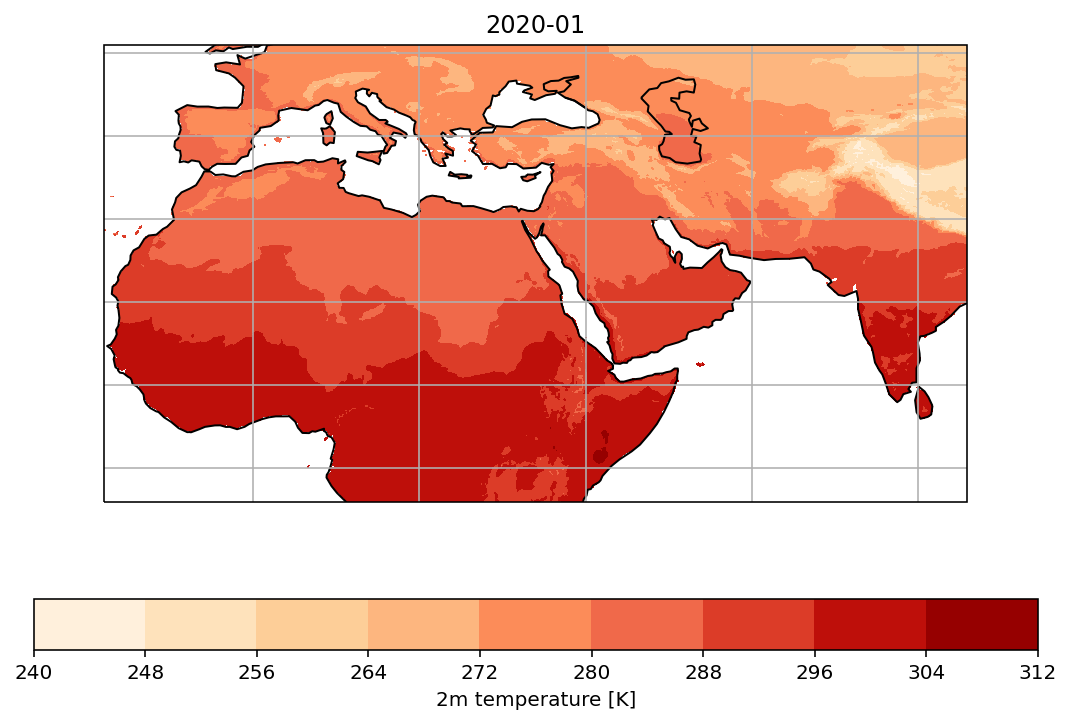

In [27]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_title('2020-01')
cs = ax.contourf(lon, lat, t2m, cmap='OrRd', transform=ccrs.PlateCarree())
cbar = fig.colorbar(cs, orientation="horizontal")
cbar.ax.set_xlabel("2m temperature [K]")

For images without contours,

Text(0.5, 0, '2m temperature [K]')

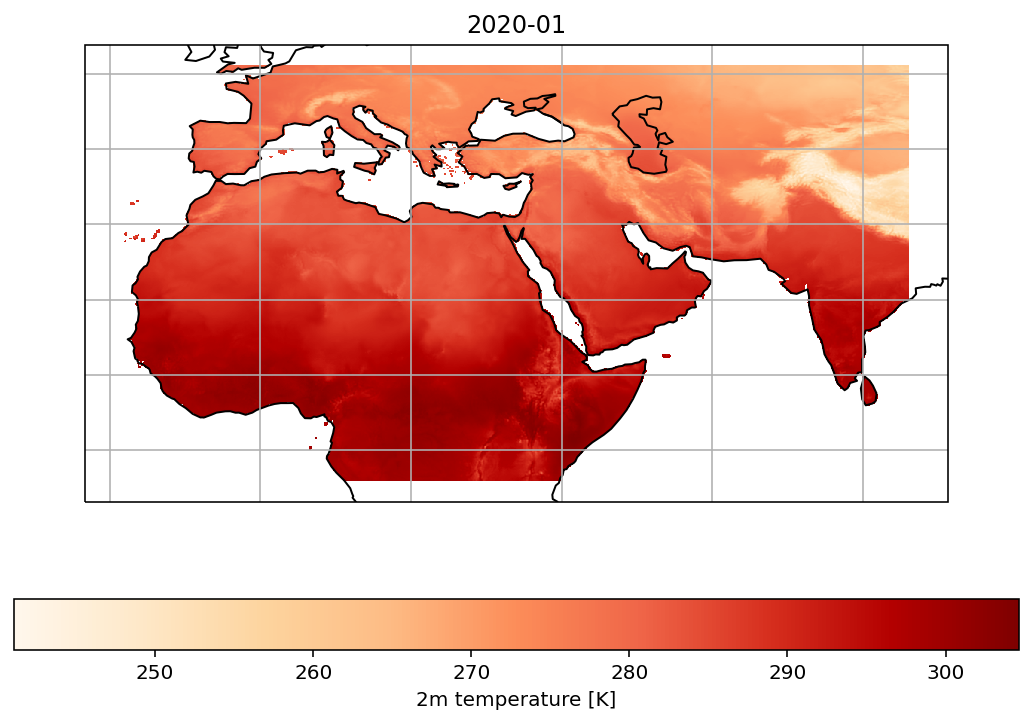

In [28]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_title('2020-01')
cs = ax.pcolormesh(lon, lat, t2m, shading='auto', cmap='OrRd', transform=ccrs.PlateCarree())
cbar = fig.colorbar(cs, orientation="horizontal")
cbar.ax.set_xlabel("2m temperature [K]")

Browse the [Cartopy Gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) to learn more about all the different types of data and plotting methods available.

## References

* [Seaborn documentation](https://seaborn.pydata.org/)
* [Cartopy documentation](https://scitools.org.uk/cartopy/docs/latest/)
* [Tutorial on plotting maps with python](https://machinelearningmastery.com/time-series-data-visualization-with-python/) by Julius Busecke 
* Research computing in Earth Sciences - [Maps with Cartopy](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html)
* [ERA5-Land monthly averaged data from 1981 to present](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land-monthly-means?tab=overview)